In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
df = pd.read_csv("Dataset/cleaned_dataset.csv")
airports = pd.read_csv("Dataset/airports.csv")

In [4]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [4]:
airports = airports.loc[:, ["iata", "state"]]
q3 = df.loc[:, ["Origin", "Dest", "Year", "Month"]]

airports.rename({"iata":"Origin"}, axis = 1, inplace = True)

In [5]:
#merging the q3 and airports data frames based on state
q3 = pd.merge(q3, airports, on = "Origin", how = "inner")

q3.dropna(inplace = True)

In [ ]:
#changing the data types
q3["Year"] = q3["Year"].astype(str)
q3["Month"] = q3["Month"].astype(str)

In [ ]:
#inserting leading zeros in the month column to convert to datetime
q3["Month"] = q3["Month"].apply(lambda x: str(x).zfill(2) if len(x)==1 else x)


#converting to datetime 
q3["Yearmonth"] = pd.to_datetime(q3["Month"].astype(str) + "/" + q3["Year"].astype(str),
                                format = "%m/%Y")

#change the datetime format
q3["Yearmonth"] = q3['Yearmonth'].dt.to_period('M')

In [ ]:
#group the data according to the Year-Month
group = q3.groupby("Yearmonth").size().reset_index().rename({0:"Count"}, axis = 1)

In [ ]:
#plot a time series graph to show seasonality

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(group["Yearmonth"].astype(str), group["Count"])

ax.set_xlabel("Year - Month", 
             size = 13)
ax.set_ylabel("Number of flights",
             size = 13)

ax.set_title("The trend of the number of people over time",
            size = 15)

ax.tick_params("x", rotation = 75, labelsize = 13)
ax.tick_params("y", labelsize=13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


#plt.savefig("Figures/Time series trend of number of flights.png")
plt.show()

In [ ]:
group2 = q3.groupby(["Year", "Month"]).size().reset_index().rename({0:"Count"}, axis = 1)

In [ ]:
# Line plot for change between years
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.lineplot(x= "Month", y = "Count", data = group2, 
           palette = "Set2", hue = "Year")

ax.set_ylabel("Count",
               size = 15)

ax.set_xlabel("Month",
                 size = 15)

ax.set_title("Change in the number of flights between years",
                size = 18)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Figures/Change in number of flights over years.png")
plt.show()


*location wise analysis*

In [8]:
#top 10 states
top_states = q3.groupby("state").size().sort_values(ascending = False).head(10).index

In [9]:
#filter only for the top 10 states
top_10 = q3[q3["state"].isin (top_states)]

In [10]:
top_10 = top_10.groupby(["state", "Year", "Month"]).size().reset_index()
top_10.rename({0: "Count"}, axis = 1, inplace = True)

In [95]:
top_10

,state,Year,Month,Count
0,AZ,2006,1,20441
1,AZ,2006,2,18501
2,AZ,2006,3,20951
3,AZ,2006,4,19973
4,AZ,2006,5,20512
...,...,...,...,...
235,VA,2007,8,18773
236,VA,2007,9,17682
237,VA,2007,10,18518
238,VA,2007,11,17921


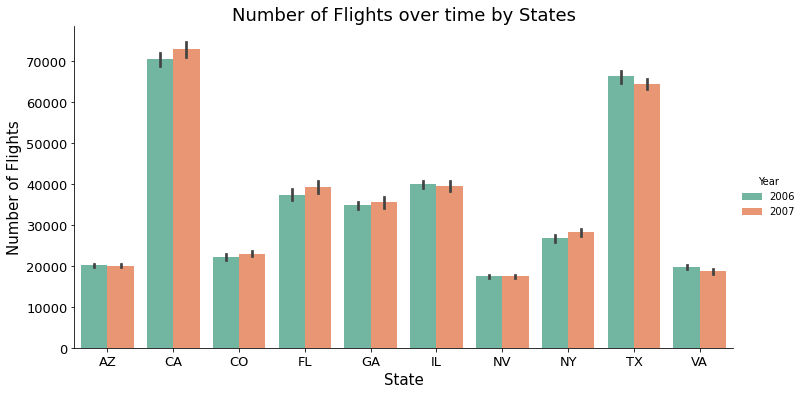

In [172]:
# Side by side yearly chart for the top 10 states 


side = sns.catplot(data = top_10, x = "state", y = "Count", 
            hue = "Year", palette = "Set2", kind = "bar", aspect = 2, height = 5)

plt.xlabel("State", size = 15)
plt.ylabel("Number of Flights", size = 15)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Number of Flights over time by States", size = 18)

plt.savefig("Figures/Change in number of flights over time by states.png")
plt.show()
